<a href="https://colab.research.google.com/github/worawit-saetan/The-IMDB-dataset---movie-reviews-classification/blob/main/The_IMDB_dataset_movie_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This project is to classify movie reviews as positive or negative (a binary classification) by using the IMDB dataset from Keras. 

The outline of this project is as follows

*   load the IMDB dataset
*   encode X_train , X_test into binary vector
*   create deep neural network model
*   train and validate the model
*   plot the accuracy and loss of the model



download the IMDB dataset form Keras datasets, where the dataset is the lists of reviews and contains 50,000 examples.

the training data contains 25,000 examples 

the test data contains 25,000 examples

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


each review is  a list of word indices (encoding a sequence of words).

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


train_labels is list of 0s and 1s, where 0 stands for negative and 1 stands for postive.

In [ ]:
train_labels[0]

1

Because we’re restricting to the top 10,000 most frequent words, no word
index will exceed 10,000

In [ ]:
max([max(sequence) for sequence in train_data])

9999

Create the reverse word index from the given word index

Then use it to decode some reviews 

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [ ]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Encode the train and test data into binary vector

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

change the type of the target label to float32 

In [ ]:
y_train = train_labels.astype('float32')
y_test =  test_labels.astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Create the deep neural network model with 2 hidden layers and 1 output layer

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

or we can use the custom settings of the optimizer and loss function

In [ ]:
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

Let's split the training data into 2 groups to use one group as a training set and the other as a validation set

In [ ]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 43ms/step - loss: 0.5078 - accuracy: 0.7938 - val_loss: 0.4229 - val_accuracy: 0.8233
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3114 - accuracy: 0.8992 - val_loss: 0.3233 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2241 - accuracy: 0.9256 - val_loss: 0.2857 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1785 - accuracy: 0.9420 - val_loss: 0.2798 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1466 - accuracy: 0.9534 - val_loss: 0.2808 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1191 - accuracy: 0.9633 - val_loss: 0.3380 - val_accuracy: 0.8750
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1001 - accuracy: 0.9709 - val_loss: 0.3188 - val_accuracy: 0.8836
Epoch 8/20
30

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plot the loss graph

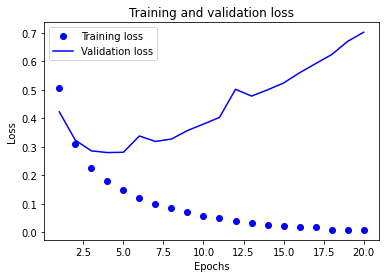

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plot the accuracy graph

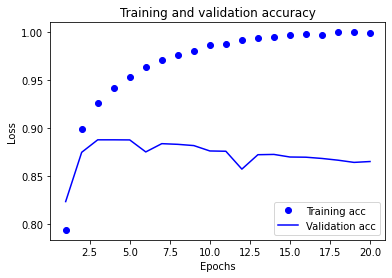

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can see in the above graphs, training loss decreases as the epochs increase and the accuracy increase. Howerver that isn’t the case for the validation loss and accuracy, they seem to peak at the fourth epoch. This is called overfitting.

In this case, to prevent overfitting, we could stop training after three epochs.

Let's create a new model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4600 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2565 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1978 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3254 - accuracy: 0.8716


[0.32540690898895264, 0.8715999722480774]

Let's use our model to predict the test set

In [ ]:
model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


array([[0.11026611],
       [0.99990606],
       [0.7816819 ],
       ...,
       [0.07086488],
       [0.04560115],
       [0.30306974]], dtype=float32)